### Visualization Challenge - Internship

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [3]:
shares_query_path = '../sql_challenge/response/sql/share_comparison.sql'
avg_query_path = '../sql_challenge/response/sql/avg_gdp.sql'
median_query_path = '../sql_challenge/response/sql/median_gdp.sql'

with open(shares_query_path, 'r') as query:
  shares_query = query.read()

with open(avg_query_path, 'r') as query:
  avg_gdp_query = query.read()

with open(median_query_path, 'r') as query:
  median_gdp_query = query.read()

conn = sqlite3.connect('../sql_challenge/countries.db')

   3. **GDP Share Comparison:** For 2012, compare the GDP per capita percentage share for North America, Europe, and the Rest of the World.

  continent_code  percentage_share
0             EU         39.095633
1             NA         12.413910
2  Rest of World         48.490457


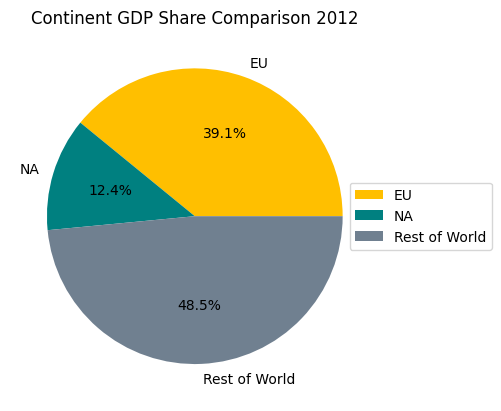

In [7]:
df_shares = pd.read_sql_query(shares_query, conn)
# df_shares
df_shares_filter = df_shares[df_shares['continent_code'].isin(['EU', 'NA'])]

EU_NA_sum = df_shares.loc[df_shares['continent_code'].isin(['EU', 'NA']), 'percentage_share'].sum()
rest_of_world_row = pd.DataFrame({'continent_code': ['Rest of World'], 'percentage_share': [100 - EU_NA_sum]})

df_shares = pd.concat([df_shares_filter, rest_of_world_row])
df_shares.reset_index(drop=True, inplace=True)

colors = ['#FFBF00', '#008080', '#708090']

df_shares.plot(kind='pie', y='percentage_share', labels=df_shares['continent_code'], 
               colors=colors, autopct='%1.1f%%')

print(df_shares)

plt.title('Continent GDP Share Comparison 2012')
plt.ylabel('')
plt.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
plt.show()

 4. **Average GDP:** Calculate the average GDP per capita for each continent from 2004 to 2012.

  continent_code   average_gdp
0             EU  27650.485872
1             NA  14638.935623
2             AS  11597.041151
3             OC   8626.322019
4             SA   5948.240446
5             AF   2195.298956


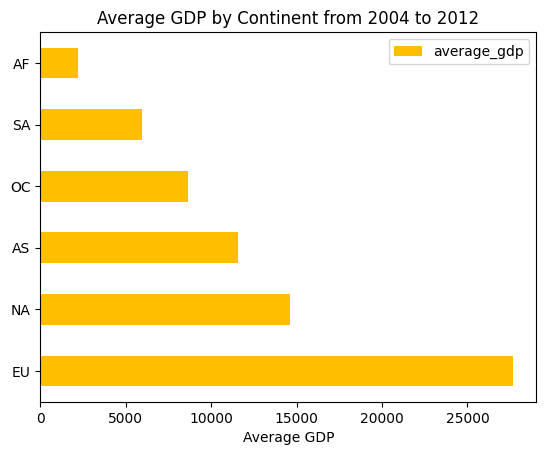

In [8]:
df_avg_gdp = pd.read_sql_query(avg_gdp_query, conn)
print(df_avg_gdp)

df_avg_gdp.plot(kind='barh', x='continent_code', y='average_gdp', color=['#FFBF00'])
plt.title('Average GDP by Continent from 2004 to 2012')
plt.xlabel('Average GDP')
plt.ylabel('')
plt.yticks(rotation=0)
plt.show()

   5. **Median GDP:** Calculate the median GDP per capita for each continent from 2004 to 2012.

  continent_code  year  median_gdp_per_capita  rowN  median_millions
0             AF  2010           1.222303e+05     5         0.122230
1             AS  2007           5.495355e+05    14         0.549535
2             EU  2011           1.408581e+06    23         1.408581
3             NA  2006           3.954195e+05    32         0.395420
4             OC  2007           1.072004e+05    41         0.107200
5             SA  2009           7.482945e+04    50         0.074829


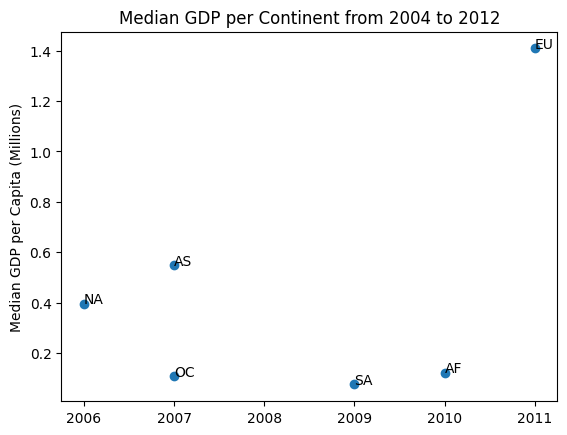

In [6]:
df_median_gdp = pd.read_sql_query(median_gdp_query, conn)

df_median_gdp['median_millions'] = df_median_gdp['median_gdp_per_capita'] / 1000000

print(df_median_gdp)

for index, row in df_median_gdp.iterrows():
    plt.text(row['year'], row['median_millions'], row['continent_code'], fontsize=10)

plt.scatter(df_median_gdp['year'], df_median_gdp['median_millions'])
plt.title('Median GDP per Continent from 2004 to 2012')
plt.ylabel('Median GDP per Capita (Millions)')
plt.show()